In [8]:
import pandas as pd
import numpy as np
import matplotlib as plot
import matplotlib.pyplot as plt
import requests

import re

In [11]:

df = pd.read_csv("../web-data-pipeline/datasets_684490_1200989_dividend_stocks_only.csv", encoding = "latin-1")
df

,symbol,security_name,listing_exchange,etf,financial_status,zip,sector,fullTimeEmployees,city,state,...,enterpriseToRevenue,forwardEps,revenueQuarterlyGrowth,bookValue,sharesShort,shortRatio,floatShares,enterpriseValue,regularMarketPrice,latest_dividend
0,A,"Agilent Technologies, Inc. Common Stock",N,N,NaN,95051,Healthcare,16300.0,Santa Clara,CA,...,4.987,3.57,NaN,15.636,5258241.0,2.55,3.085180e+08,2.611031e+10,86.30,0.180000
1,AAL,"American Airlines Group, Inc. - Common Stock",Q,N,N,76155,Industrials,131500.0,Fort Worth,TX,...,0.796,-0.04,NaN,-6.233,119303588.0,1.49,4.167541e+08,3.478515e+10,12.43,0.100000
2,AAP,Advance Auto Parts Inc Advance Auto Parts Inc W/I,N,N,NaN,27604,Consumer Cyclical,39000.0,Raleigh,NC,...,1.175,8.54,NaN,51.606,1691705.0,1.57,6.857524e+07,1.141075e+10,137.50,0.250000
3,AAPL,Apple Inc. - Common Stock,Q,N,N,95014,Technology,137000.0,Cupertino,CA,...,5.108,14.73,NaN,18.137,33592445.0,0.89,4.329827e+09,1.368917e+12,316.14,0.820000
4,AAT,"American Assets Trust, Inc. Common Stock",N,N,NaN,92130,Real Estate,205.0,San Diego,CA,...,7.849,1.35,NaN,21.713,706006.0,1.70,5.308802e+07,2.936203e+09,28.01,0.300000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1934,ZIONN,Zions Bancorporation N.A. - Depositary Shares ...,Q,N,N,84133-1109,Financial Services,9879.0,Salt Lake City,UT,...,2.899,NaN,NaN,NaN,NaN,NaN,1.613270e+08,7.343870e+09,25.70,0.359000
1935,ZIONO,Zions Bancorporation N.A. - Depositary Shares ...,Q,N,N,84133-1109,Financial Services,9879.0,Salt Lake City,UT,...,2.947,NaN,NaN,NaN,NaN,NaN,1.613270e+08,7.464227e+09,27.39,0.394000
1936,ZNH,China Southern Airlines Company Limited Common...,N,N,NaN,510403,Industrials,103876.0,Guangzhou,NaN,...,NaN,0.07,NaN,41.000,122159.0,3.66,7.590681e+07,5.503053e+09,21.33,0.364589
1937,ZTR,Virtus Total Return Fund Inc.,N,N,NaN,06103,Financial Services,NaN,Hartford,CT,...,45.460,NaN,NaN,10.327,78756.0,NaN,NaN,5.729830e+08,8.34,0.113000


In [12]:
len(df)

1939

In [13]:
df.isnull().sum().sort_values().tail()

fullTimeEmployees          569
forwardEps                 586
forwardPE                  588
financial_status          1305
revenueQuarterlyGrowth    1939
dtype: int64

In [14]:
display(df.head(),df.shape)

,symbol,security_name,listing_exchange,etf,financial_status,zip,sector,fullTimeEmployees,city,state,...,enterpriseToRevenue,forwardEps,revenueQuarterlyGrowth,bookValue,sharesShort,shortRatio,floatShares,enterpriseValue,regularMarketPrice,latest_dividend
0,A,"Agilent Technologies, Inc. Common Stock",N,N,NaN,95051,Healthcare,16300.0,Santa Clara,CA,...,4.987,3.57,NaN,15.636,5258241.0,2.55,3.085180e+08,2.611031e+10,86.30,0.18
1,AAL,"American Airlines Group, Inc. - Common Stock",Q,N,N,76155,Industrials,131500.0,Fort Worth,TX,...,0.796,-0.04,NaN,-6.233,119303588.0,1.49,4.167541e+08,3.478515e+10,12.43,0.10
2,AAP,Advance Auto Parts Inc Advance Auto Parts Inc W/I,N,N,NaN,27604,Consumer Cyclical,39000.0,Raleigh,NC,...,1.175,8.54,NaN,51.606,1691705.0,1.57,6.857524e+07,1.141075e+10,137.50,0.25
3,AAPL,Apple Inc. - Common Stock,Q,N,N,95014,Technology,137000.0,Cupertino,CA,...,5.108,14.73,NaN,18.137,33592445.0,0.89,4.329827e+09,1.368917e+12,316.14,0.82
4,AAT,"American Assets Trust, Inc. Common Stock",N,N,NaN,92130,Real Estate,205.0,San Diego,CA,...,7.849,1.35,NaN,21.713,706006.0,1.70,5.308802e+07,2.936203e+09,28.01,0.30


(1939, 40)

In [15]:
df["Close"]= (df["ask"] + df["dayLow"])/2
df

,symbol,security_name,listing_exchange,etf,financial_status,zip,sector,fullTimeEmployees,city,state,...,forwardEps,revenueQuarterlyGrowth,bookValue,sharesShort,shortRatio,floatShares,enterpriseValue,regularMarketPrice,latest_dividend,Close
0,A,"Agilent Technologies, Inc. Common Stock",N,N,NaN,95051,Healthcare,16300.0,Santa Clara,CA,...,3.57,NaN,15.636,5258241.0,2.55,3.085180e+08,2.611031e+10,86.30,0.180000,85.785
1,AAL,"American Airlines Group, Inc. - Common Stock",Q,N,N,76155,Industrials,131500.0,Fort Worth,TX,...,-0.04,NaN,-6.233,119303588.0,1.49,4.167541e+08,3.478515e+10,12.43,0.100000,11.505
2,AAP,Advance Auto Parts Inc Advance Auto Parts Inc W/I,N,N,NaN,27604,Consumer Cyclical,39000.0,Raleigh,NC,...,8.54,NaN,51.606,1691705.0,1.57,6.857524e+07,1.141075e+10,137.50,0.250000,138.970
3,AAPL,Apple Inc. - Common Stock,Q,N,N,95014,Technology,137000.0,Cupertino,CA,...,14.73,NaN,18.137,33592445.0,0.89,4.329827e+09,1.368917e+12,316.14,0.820000,315.035
4,AAT,"American Assets Trust, Inc. Common Stock",N,N,NaN,92130,Real Estate,205.0,San Diego,CA,...,1.35,NaN,21.713,706006.0,1.70,5.308802e+07,2.936203e+09,28.01,0.300000,29.315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1934,ZIONN,Zions Bancorporation N.A. - Depositary Shares ...,Q,N,N,84133-1109,Financial Services,9879.0,Salt Lake City,UT,...,NaN,NaN,NaN,NaN,NaN,1.613270e+08,7.343870e+09,25.70,0.359000,25.650
1935,ZIONO,Zions Bancorporation N.A. - Depositary Shares ...,Q,N,N,84133-1109,Financial Services,9879.0,Salt Lake City,UT,...,NaN,NaN,NaN,NaN,NaN,1.613270e+08,7.464227e+09,27.39,0.394000,27.345
1936,ZNH,China Southern Airlines Company Limited Common...,N,N,NaN,510403,Industrials,103876.0,Guangzhou,NaN,...,0.07,NaN,41.000,122159.0,3.66,7.590681e+07,5.503053e+09,21.33,0.364589,21.165
1937,ZTR,Virtus Total Return Fund Inc.,N,N,NaN,06103,Financial Services,NaN,Hartford,CT,...,NaN,NaN,10.327,78756.0,NaN,NaN,5.729830e+08,8.34,0.113000,8.245


In [16]:
Nasdaq = df[["symbol","open","sector","dayLow","dayHigh","fiftyTwoWeekHigh"]]

Nasdaq 

,symbol,open,sector,dayLow,dayHigh,fiftyTwoWeekHigh
0,A,86.30,Healthcare,84.37,86.48,90.64
1,AAL,12.43,Industrials,11.07,12.55,34.99
2,AAP,137.50,Consumer Cyclical,136.31,141.78,171.43
3,AAPL,316.14,Technology,313.09,318.71,327.85
4,AAT,28.01,Real Estate,27.21,28.52,49.26
...,...,...,...,...,...,...
1934,ZIONN,25.70,Financial Services,25.60,25.70,26.57
1935,ZIONO,27.39,Financial Services,27.30,27.42,29.42
1936,ZNH,21.33,Industrials,21.00,21.33,36.43
1937,ZTR,8.34,Financial Services,8.10,8.42,11.96


In [17]:
Nasdaq.isnull().sum().sort_values(ascending=False).head(20)

sector              13
fiftyTwoWeekHigh     0
dayHigh              0
dayLow               0
open                 0
symbol               0
dtype: int64

In [18]:
valid_columns = Nasdaq.isnull().sum().sort_values(ascending=False) == 0
valid_columns

sector              False
fiftyTwoWeekHigh     True
dayHigh              True
dayLow               True
open                 True
symbol               True
dtype: bool

In [19]:
valid_columns = [colName for colName,isValid in valid_columns.items() if isValid]

In [20]:
valid_columns

['fiftyTwoWeekHigh', 'dayHigh', 'dayLow', 'open', 'symbol']

In [21]:
valid_columns.append("sector")

In [22]:
Nasdaq.sector.value_counts()

Financial Services        879
Industrials               214
Real Estate               170
Energy                    121
Consumer Cyclical         108
Technology                107
Basic Materials            95
Consumer Defensive         69
Utilities                  68
Healthcare                 49
Communication Services     45
Financial                   1
Name: sector, dtype: int64

In [23]:
Nasdaq = Nasdaq.rename(columns={"symbol":"Ticker","open":"OpenPrice","sector":"Sector","dayLow":"Daylow","dayHigh":"Dayhigh","fiftyTwoWeekHigh":"52weekhigh"})
Nasdaq

,Ticker,OpenPrice,Sector,Daylow,Dayhigh,52weekhigh
0,A,86.30,Healthcare,84.37,86.48,90.64
1,AAL,12.43,Industrials,11.07,12.55,34.99
2,AAP,137.50,Consumer Cyclical,136.31,141.78,171.43
3,AAPL,316.14,Technology,313.09,318.71,327.85
4,AAT,28.01,Real Estate,27.21,28.52,49.26
...,...,...,...,...,...,...
1934,ZIONN,25.70,Financial Services,25.60,25.70,26.57
1935,ZIONO,27.39,Financial Services,27.30,27.42,29.42
1936,ZNH,21.33,Industrials,21.00,21.33,36.43
1937,ZTR,8.34,Financial Services,8.10,8.42,11.96


In [24]:

a = Nasdaq.loc[Nasdaq['Ticker'] == 'AAPL']
b=Nasdaq.loc[Nasdaq['Ticker'] == 'MSFT']



In [25]:
b

,Ticker,OpenPrice,Sector,Daylow,Dayhigh,52weekhigh
1203,MSFT,180.74,Technology,180.39,182.47,190.7


In [26]:
pd.set_option('display.max_rows', df.shape[0]+1)
print(Nasdaq)

     Ticker  OpenPrice                  Sector     Daylow    Dayhigh  \
0         A    86.3000              Healthcare    84.3700    86.4800   
1       AAL    12.4300             Industrials    11.0700    12.5500   
2       AAP   137.5000       Consumer Cyclical   136.3100   141.7800   
3      AAPL   316.1400              Technology   313.0900   318.7100   
4       AAT    28.0100             Real Estate    27.2100    28.5200   
5       ABB    19.6600             Industrials    19.3450    19.6900   
6      ABBV    90.5400              Healthcare    88.5600    91.0000   
7      ABEV     2.5000      Consumer Defensive     2.4200     2.5900   
8       ABM    34.3300             Industrials    32.7300    34.4400   
9       ABR     8.6900             Real Estate     8.1458     8.9500   
10      ABT    89.2800              Healthcare    88.1700    90.7800   
11     ABTX    27.3800      Financial Services    26.8400    28.1600   
12       AC    42.1100      Financial Services    41.9900    43.

In [27]:
Nasdaq_ticker=Nasdaq.iloc[[3,100,1183,500,1172,1203,959,300,833,1215]]

In [28]:
Nasdaq_ticker

,Ticker,OpenPrice,Sector,Daylow,Dayhigh,52weekhigh
3,AAPL,316.14,Technology,313.0900,318.710,327.85
100,AOS,45.43,Industrials,45.3700,47.310,52.61
1183,MOS,13.13,Basic Materials,12.3550,13.150,25.71
500,DGX,112.15,Healthcare,115.4150,117.370,125.00
1172,MMLP,2.53,Energy,2.4726,2.531,7.26
1203,MSFT,180.74,Technology,180.3900,182.470,190.70
959,IRL,7.35,Financial Services,7.1842,7.350,10.08
300,BZM,13.12,Financial Services,13.1000,13.200,18.74
833,GSBC,43.93,Financial Services,42.5700,44.250,64.48
1215,MUR,13.04,Energy,12.6200,13.050,28.12


In [29]:
Nasdaq_ticker.columns

Index(['Ticker', 'OpenPrice', 'Sector', 'Daylow', 'Dayhigh', '52weekhigh'], dtype='object')

In [30]:
from alpha_vantage.timeseries import TimeSeries
ts = TimeSeries(key='token')
# Get json object with the intraday data and another with  the call's metadata
data, meta_data = ts.get_intraday('AAPL')
ts = TimeSeries(key='YOUR_API_KEY',rapidapi=True)


In [31]:
import request

response = requests.get("https://alpha-vantage.p.rapidapi.com/query")
print(response.status_code)

401


In [32]:
import os
from dotenv import load_dotenv
load_dotenv()

def getFromGithub(endpoint, queryParams={}):
    url ="https://alpha-vantage.p.rapidapi.com/query}"

    apiKey = os.getenv("token")
    if not apiKey:
        raise ValueError("Please setup the token env variable")
    headers = {
        "Authorization": f"token {apiKey}"
    }
    
    res = requests.get(url, headers=headers, params=queryParams)
    print(res.url)
    return res.json()


getFromGithub("")


https://alpha-vantage.p.rapidapi.com/query%7D


{'message': 'Missing RapidAPI application key. Go to https://docs.rapidapi.com/docs/keys to learn how to get your API application key.'}

In [188]:
from alpha_vantage.timeseries import TimeSeries
from pprint import pprint
ts = TimeSeries(key='token', output_format='pandas')
data, meta_data = ts.get_intraday(symbol='AAPL',interval='60min', outputsize='full')
pprint(data.head(5))

                     1. open   2. high    3. low  4. close  5. volume
date                                                                 
2020-06-19 15:30:00  347.760  350.3200  347.1200   349.510  5763084.0
2020-06-19 14:30:00  345.815  348.8500  345.1500   347.760  5688418.0
2020-06-19 13:30:00  348.675  349.2897  345.6900   345.800  5377518.0
2020-06-19 12:30:00  349.580  351.1600  348.5602   348.690  4089993.0
2020-06-19 11:30:00  353.680  353.8341  348.1200   349.605  5860444.0


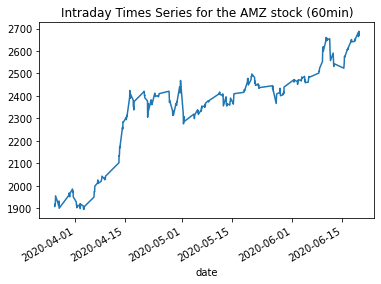

In [18]:
from alpha_vantage.timeseries import TimeSeries
import matplotlib.pyplot as plt

ts = TimeSeries(key='token', output_format='pandas')
data, meta_data = ts.get_intraday(symbol='AMZN',interval='60min', outputsize='full')
data['4. close'].plot()
plt.title('Intraday Times Series for the AMZ stock (60min)')
plt.show()

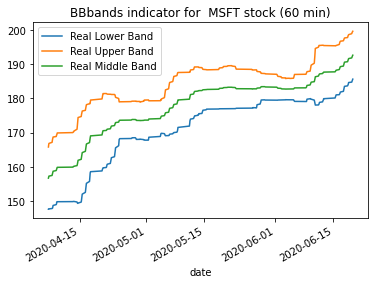

In [99]:
from alpha_vantage.techindicators import TechIndicators
import matplotlib.pyplot as plt

ti = TechIndicators(key='Token', output_format='pandas')
data, meta_data = ti.get_bbands(symbol='MSFT', interval='60min', time_period=60)
data.plot()
plt.title('BBbands indicator for  MSFT stock (60 min)')
plt.show()

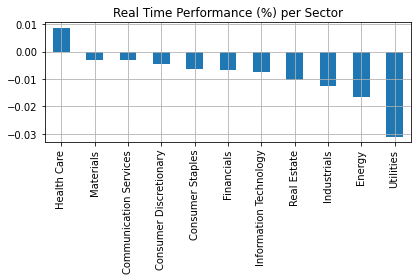

In [96]:
from alpha_vantage.sectorperformance import SectorPerformances
import matplotlib.pyplot as plt

sp = SectorPerformances(key='token', output_format='pandas')
data, meta_data = sp.get_sector()
data['Rank A: Real-Time Performance'].plot(kind='bar')
plt.title('Real Time Performance (%) per Sector')
plt.tight_layout()
plt.grid()
plt.show()

In [95]:
import asyncio
from alpha_vantage.async_support.timeseries import TimeSeries

symbols = ['AAPL', 'GOOG', 'TSLA', 'MSFT']


async def get_data(symbol):
    ts = TimeSeries(key="6bece6952dmshfc8e884c923d5d3p121531jsn35fcd00b74b0")
    data, _ = await ts.get_quote_endpoint(symbol)
    await ts.close()
    return data

tasks = [get_data(symbol) for symbol in symbols]
group1 = asyncio.gather(*tasks)
print(group1)

_GatheringFuture exception was never retrieved
future: <_GatheringFuture finished exception=ClientConnectorCertificateError(ConnectionKey(host='www.alphavantage.co', port=443, is_ssl=True, ssl=None, proxy=URL(''), proxy_auth=None, proxy_headers_hash=None), SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:1108)'))>
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/aiohttp/connector.py", line 936, in _wrap_create_connection
    return await self._loop.create_connection(*args, **kwargs)  # type: ignore  # noqa
  File "/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/asyncio/base_events.py", line 1050, in create_connection
    transport, protocol = await self._create_connection_transport(
  File "/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/asyncio/base_events.py", line 1080, in _create_connection_tra

<_GatheringFuture pending>


Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x11b796220>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x11b70d790>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x11b7d4b20>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x11b6ebe20>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x11b6dd0d0>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x11b6dd430>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x11910daf0>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x11b642e50>


In [181]:
url = "https://alpha-vantage.p.rapidapi.com/query"

querystring = {"function":"sector"}

headers = {
    'x-rapidapi-host': "alpha-vantage.p.rapidapi.com",
    'x-rapidapi-key': "6bece6952dmshfc8e884c923d5d3p121531jsn35fcd00b74b0"
    }

response = requests.request("GET", url, headers=headers, params=querystring)

print(response.text)

{
    "Meta Data": {
        "Information": "US Sector Performance (realtime & historical)",
        "Last Refreshed": "2020-06-21 07:59:03 US/Eastern"
    },
    "Rank A: Real-Time Performance": {
        "Health Care": "0.87%",
        "Materials": "-0.31%",
        "Communication Services": "-0.32%",
        "Consumer Discretionary": "-0.45%",
        "Consumer Staples": "-0.64%",
        "Financials": "-0.67%",
        "Information Technology": "-0.76%",
        "Real Estate": "-1.03%",
        "Industrials": "-1.27%",
        "Energy": "-1.67%",
        "Utilities": "-3.10%"
    },
    "Rank B: 1 Day Performance": {
        "Health Care": "0.87%",
        "Materials": "-0.31%",
        "Communication Services": "-0.32%",
        "Consumer Discretionary": "-0.45%",
        "Consumer Staples": "-0.64%",
        "Financials": "-0.67%",
        "Information Technology": "-0.76%",
        "Real Estate": "-1.03%",
        "Industrials": "-1.27%",
        "Energy": "-1.68%",
        "Uti